# H2 vs EnMap 23 April 2025

## Imports

In [ ]:
from hypso import Hypso1, Hypso2
import os 
import sys
import matplotlib.pyplot as plt
from global_land_mask import globe 
import numpy as np 
import pandas as pd

funksjoner_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'funksjoner'))
if funksjoner_path not in sys.path:
    sys.path.append(funksjoner_path)


import universal_funkjsoner as uf

import xarray as xr
import re
import math
import importlib

from sklearn.cluster import KMeans
from collections import defaultdict

from sklearn.preprocessing import StandardScaler

np.random.seed(42)

dir_path = "../data/" ## filene hentes fra en mappe over der vi er nå

hei fra utformet bedre :)


In [ ]:

importlib.reload(uf)

hei fra utformet bedre :)


<module 'universal_funkjsoner' from '/home/itk/Documents/AnneMarthe/Master/Hypso_H1_H2/funksjoner/universal_funkjsoner.py'>

## Data uploading 

In [ ]:
## H2
i_250423_10 = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1a.nc")
i_250423_10_b = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1b.nc")
i_250423_10_c = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1c.nc")
i_250423_10_d = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1d.nc")

satobj_h2_250423_10 = Hypso2( path = i_250423_10, verbose = True )

l1a_cube_250423_10 = satobj_h2_250423_10.l1a_cube
l1b_cube_250423_10 = Hypso2( path = i_250423_10_b, verbose = True )
l1c_cube_250423_10 = Hypso2( path = i_250423_10_c, verbose = True )
l1d_cube_250423_10 = Hypso2( path = i_250423_10_d, verbose = True )

l1c_cube_250423_10 = l1c_cube_250423_10.l1c_cube
l1b_cube_250423_10 = l1b_cube_250423_10.l1b_cube
l1d_cube_250423_10 = l1d_cube_250423_10.l1d_cube

satobj_h2_250423_10.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture image64N9E_2025-04-23T10-28-01Z


[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture image64N9E_2025-04-23T10-28-01Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture image64N9E_2025-04-23T10-28-01Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture image64N9E_2025-04-23T10-28-01Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 539
[INFO] ADCS time range: 1745403420.000000 to 1745404350.000000
[INFO] Frame time range: 1745404081.613977 to 1745404156.238977
[INFO] 298 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry computations...
[INFO] Using UTM map: WGS 84 / UTM zone 32

In [ ]:
## H2
i_250423_12 = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1a.nc")
i_250423_12_b = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1b.nc")
i_250423_12_c = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1c.nc")
i_250423_12_d = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1d.nc")

satobj_h2_250423_12 = Hypso2( path = i_250423_12, verbose = True )

l1a_cube_250423_12 = satobj_h2_250423_10.l1a_cube
l1b_cube_250423_12 = Hypso2( path = i_250423_12_b, verbose = True )
l1c_cube_250423_12 = Hypso2( path = i_250423_12_c, verbose = True )
l1d_cube_250423_12 = Hypso2( path = i_250423_12_d, verbose = True )

l1c_cube_250423_12 = l1c_cube_250423_12.l1c_cube
l1b_cube_250423_12 = l1b_cube_250423_12.l1b_cube
l1d_cube_250423_12 = l1d_cube_250423_12.l1d_cube

satobj_h2_250423_12.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture image64N9E_2025-04-23T12-03-20Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture image64N9E_2025-04-23T12-03-20Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture image64N9E_2025-04-23T12-03-20Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture image64N9E_2025-04-23T12-03-20Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 540
[INFO] ADCS time range: 1745409150.000000 to 1745410080.000000
[INFO] Frame time range: 1745409801.005251 to 1745409875.630251
[INFO] 298 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry

In [ ]:
path_cla_atm_250423_10 = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1c.nc.polymer.nc")######
cla_atm_250423_10 = xr.open_dataset(path_cla_atm_250423_10)

latitude_250423_10 = np.array(cla_atm_250423_10['latitude'])
longitude_250423_10 = np.array(cla_atm_250423_10['longitude'])

In [ ]:
path_cla_atm_250423_12 = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1c.nc.polymer.nc")######
cla_atm_250423_12 = xr.open_dataset(path_cla_atm_250423_12)

latitude_250423_12 = np.array(cla_atm_250423_12['latitude'])
longitude_250423_12 = np.array(cla_atm_250423_12['longitude'])

In [ ]:
rho_vars = [var for var in cla_atm_250423_10.variables if re.match(r'rho_w_\d+', var)]
rho_vars_sorted = sorted(rho_vars, key=lambda v: int(v.split('_')[-1])) 
rho_vars_sorted = rho_vars_sorted[5:]
print("Sorted rho variables:", rho_vars_sorted)
print(len(rho_vars_sorted))

Sorted rho variables: ['rho_w_418', 'rho_w_422', 'rho_w_425', 'rho_w_429', 'rho_w_432', 'rho_w_436', 'rho_w_439', 'rho_w_443', 'rho_w_446', 'rho_w_450', 'rho_w_453', 'rho_w_457', 'rho_w_460', 'rho_w_464', 'rho_w_467', 'rho_w_471', 'rho_w_474', 'rho_w_478', 'rho_w_481', 'rho_w_485', 'rho_w_488', 'rho_w_492', 'rho_w_495', 'rho_w_499', 'rho_w_502', 'rho_w_506', 'rho_w_509', 'rho_w_513', 'rho_w_516', 'rho_w_520', 'rho_w_523', 'rho_w_526', 'rho_w_530', 'rho_w_533', 'rho_w_537', 'rho_w_540', 'rho_w_544', 'rho_w_547', 'rho_w_551', 'rho_w_554', 'rho_w_558', 'rho_w_561', 'rho_w_565', 'rho_w_568', 'rho_w_572', 'rho_w_575', 'rho_w_579', 'rho_w_582', 'rho_w_585', 'rho_w_589', 'rho_w_592', 'rho_w_596', 'rho_w_599', 'rho_w_603', 'rho_w_606', 'rho_w_610', 'rho_w_613', 'rho_w_617', 'rho_w_620', 'rho_w_623', 'rho_w_627', 'rho_w_630', 'rho_w_634', 'rho_w_637', 'rho_w_641', 'rho_w_644', 'rho_w_648', 'rho_w_651', 'rho_w_654', 'rho_w_658', 'rho_w_661', 'rho_w_665', 'rho_w_668', 'rho_w_672', 'rho_w_675', 'r

## Target lat long

In [ ]:
#wl = satobj_h1_25_0511.wavelengths[9:118]
x_123 = [387.84749685, 391.40406599, 394.95941579, 398.51354623, 402.06645732, 405.61814905, 409.16862143, 412.71787446, 416.26590814, 419.81272246, 423.35831743, 426.90269305, 430.44584931, 433.98778622, 437.52850378, 441.06800198, 444.60628083, 448.14334033, 451.67918047, 455.21380126, 458.7472027, 462.27938479, 465.81034752, 469.3400909 , 472.86861492,476.3959196 , 479.92200491, 483.44687088, 486.97051749, 490.49294475,494.01415266, 497.53414122, 501.05291042, 504.57046026, 508.08679076,511.6019019 , 515.11579369, 518.62846612, 522.13991921, 525.65015294,529.15916731, 532.66696233, 536.173538  , 539.67889432, 543.18303128,546.68594889, 550.18764715, 553.68812606, 557.18738561, 560.68542581,564.18224665, 567.67784814, 571.17223028, 574.66539307, 578.1573365, 581.64806058, 585.1375653 , 588.62585068, 592.1129167 , 595.59876336,599.08339068, 602.56679864, 606.04898725, 609.5299565 , 613.0097064 ,616.48823695, 619.96554815, 623.44163999, 626.91651248, 630.39016561,633.86259939, 637.33381382, 640.8038089 , 644.27258462, 647.74014099,651.20647801, 654.67159568, 658.13549399, 661.59817294, 665.05963255,668.5198728 , 671.9788937 , 675.43669524, 678.89327744, 682.34864028,685.80278376, 689.25570789, 692.70741267, 696.1578981 , 699.60716418,703.0552109 , 706.50203826, 709.94764628, 713.39203494, 716.83520425,720.2771542 , 723.7178848 , 727.15739605, 730.59568795, 734.03276049,737.46861368, 740.90324752, 744.336662  , 747.76885713, 751.19983291,754.62958933, 758.0581264 , 761.48544412, 764.91154248, 768.33642149,771.76008115, 775.18252146, 778.60374241, 782.02374401, 785.44252625,788.86008915, 792.27643269, 795.69155687, 799.10546171, 802.51814719]
wl = x_123[9:118]

#target_lat_6 = [64.20992561747796,64.48557437461893,64.52896641587218,  64.22009411667561] 
#target_lon_6 = [9.704720121565003,9.886201113342556, 8.708294855080245,8.73032214102829]  

#target_lat_5 = [63.896904083590066,64.17324887890479,64.11631446557637,  63.887923483169004] 
#target_lon_5 = [9.578289180688513,9.582148298814932,8.924448409066027,  8.96230357578283]
target_lat_6 = [64.152913,64.254748,64.280744,  64.145967]
target_lon_6 = [9.500527 ,9.579630 , 9.258824 ,  9.242894 -0.25]  

target_lat_5 = [63.856648, 63.959085, 63.949196,  63.853017]
target_lon_5 = [9.500427, 9.415833, 9.148865,  9.154358]

target_lat_3 = [63.65192496143867,63.818490304354434,63.793837321385155,  63.660555970548074] #område 2.1.
target_lon_3 = [9.526455044589706,9.531415429238418, 9.442656298818237,9.439764451470932]

target_lat_2 = [63.47865598622861,63.646767083517425,63.61771951990031,  63.42721372576498] #område 5.1
target_lon_2 = [10.061035990832918,9.804697410334523, 9.723689711502818,9.982929114384596]  

target_lat_1 = [63.44802428401152,63.52676744792975, 63.55113867486421,  63.46332195091103] #område 8 
target_lon_1 = [10.706024496195505,10.726421572030368, 10.227932960954064,  10.211631333282082] 

calibration_lat = [63.642540,63.642540, 63.642540,  63.642540] ##
calibration_long = [9.503311,9.503311, 9.503311,  9.503311]

## RRS H2 AC kl 10

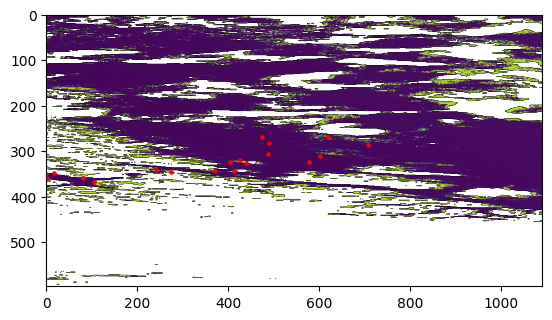

In [ ]:
RRS_AC_H2_250511_A1_10 = uf.automated_RRS_H2_AC(satobj_h2_250423_10, l1d_cube_250423_10, cla_atm_250423_10, rho_vars_sorted, target_lat_1, target_lon_1, latitude_250423_10, longitude_250423_10)
RRS_AC_H2_250511_A2_10 = uf.automated_RRS_H2_AC(satobj_h2_250423_10, l1d_cube_250423_10, cla_atm_250423_10, rho_vars_sorted, target_lat_2, target_lon_2, latitude_250423_10, longitude_250423_10)
RRS_AC_H2_250511_A3_10 = uf.automated_RRS_H2_AC(satobj_h2_250423_10, l1d_cube_250423_10, cla_atm_250423_10, rho_vars_sorted, target_lat_3, target_lon_3, latitude_250423_10, longitude_250423_10)
RRS_AC_H2_250511_A5_10 = uf.automated_RRS_H2_AC(satobj_h2_250423_10, l1d_cube_250423_10, cla_atm_250423_10, rho_vars_sorted, target_lat_5, target_lon_5, latitude_250423_10, longitude_250423_10)
RRS_AC_H2_250511_A6_10 = uf.automated_RRS_H2_AC(satobj_h2_250423_10, l1d_cube_250423_10, cla_atm_250423_10, rho_vars_sorted, target_lat_6, target_lon_6, latitude_250423_10, longitude_250423_10)

In [ ]:
RRS_median_H2_AC_A1_10 = np.median(RRS_AC_H2_250511_A1_10, axis=0)
RRS_median_H2_AC_A2_10 = np.median(RRS_AC_H2_250511_A2_10, axis=0)
RRS_median_H2_AC_A3_10 = np.median(RRS_AC_H2_250511_A3_10, axis=0)
RRS_median_H2_AC_A5_10 = np.median(RRS_AC_H2_250511_A5_10, axis=0)
RRS_median_H2_AC_A6_10 = np.median(RRS_AC_H2_250511_A6_10, axis=0)

print(RRS_median_H2_AC_A1_10.shape)

(109,)


## RRS H2 Ac kl 12

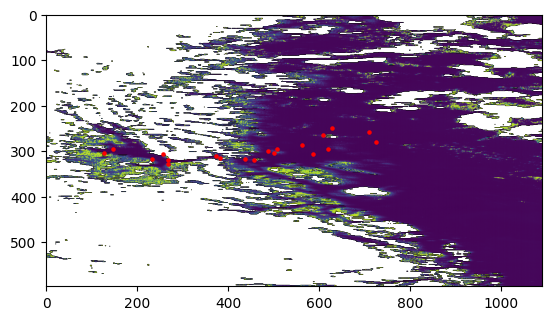

In [ ]:
RRS_AC_H2_250511_A1_12 = uf.automated_RRS_H2_AC(satobj_h2_250423_12, l1d_cube_250423_12, cla_atm_250423_12, rho_vars_sorted, target_lat_1, target_lon_1, latitude_250423_12, longitude_250423_12)
RRS_AC_H2_250511_A2_12 = uf.automated_RRS_H2_AC(satobj_h2_250423_12, l1d_cube_250423_12, cla_atm_250423_12, rho_vars_sorted, target_lat_2, target_lon_2, latitude_250423_12, longitude_250423_12)
RRS_AC_H2_250511_A3_12 = uf.automated_RRS_H2_AC(satobj_h2_250423_12, l1d_cube_250423_12, cla_atm_250423_12, rho_vars_sorted, target_lat_3, target_lon_3, latitude_250423_12, longitude_250423_12)
RRS_AC_H2_250511_A5_12 = uf.automated_RRS_H2_AC(satobj_h2_250423_12, l1d_cube_250423_12, cla_atm_250423_12, rho_vars_sorted, target_lat_5, target_lon_5, latitude_250423_12, longitude_250423_12)
RRS_AC_H2_250511_A6_12 = uf.automated_RRS_H2_AC(satobj_h2_250423_12, l1d_cube_250423_12, cla_atm_250423_12, rho_vars_sorted, target_lat_6, target_lon_6, latitude_250423_12, longitude_250423_12)

In [ ]:
RRS_median_H2_AC_A1_12 = np.median(RRS_AC_H2_250511_A1_12, axis=0)
RRS_median_H2_AC_A2_12 = np.median(RRS_AC_H2_250511_A2_12, axis=0)
RRS_median_H2_AC_A3_12 = np.median(RRS_AC_H2_250511_A3_12, axis=0)
RRS_median_H2_AC_A5_12 = np.median(RRS_AC_H2_250511_A5_12, axis=0)
RRS_median_H2_AC_A6_12 = np.median(RRS_AC_H2_250511_A6_12, axis=0)

print(RRS_median_H2_AC_A1_12.shape)

(109,)


## Ecolight - s

/tmp/ipykernel_2139100/1075601835.py:25: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  datasetb = pd.read_csv(dataset_pathb, index_col=False)


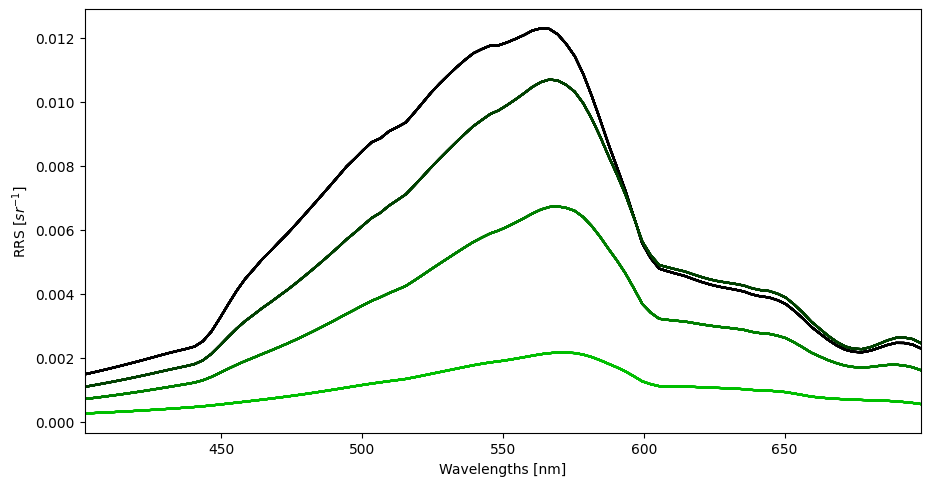

In [ ]:
# Function to plot spectral data
def plot_spectral_data(x, wl, picture_id):
    for i in range(x.shape[0]):
        #print(x.shape)
        #print(x[picture_id,:])
        plt.plot(wl, x[picture_id, :], linestyle='-', color=colors2[picture_id])
    plt.xlabel("Wavelengths [nm]")
    plt.ylabel("RRS [$sr^{-1}$]")
    plt.xlim(401.5, 698.5)


#Number of datapoints
data = pd.read_csv('../../ecolight-s/data/inputs_2025.csv')
ni = len(data['sun_angle']) 

num_colors = ni
colors2 = [(0, i / num_colors, 0) for i in range(ni)] 

#for idx in range (10,11):
    # Load the dataset
dataset_path = "../../ecolight-s/output/rrs_output2025/rrsalltest" + "19" +".txt" 
dataset_pathb = "../../ecolight-s/output/rrs_output2025/rrsalltestB" + "19" +".txt"
dataset = pd.read_csv(dataset_path, index_col=False)
datasetb = pd.read_csv(dataset_pathb, index_col=False)
# Read data from the dataset
xa = dataset.values[:, 0:-1]
xb = datasetb.values[:, 0:-3]
x_ecolight_normal = np.concatenate((xa, xb), axis=1)
wl_e = np.arange(401.5, 701.5, 3)


for i in range(0,20,5): #
    plot_spectral_data(x_ecolight_normal, wl_e, i)  

#plot_spectral_data(x, wl, 0) ## Mørkeste
#plot_spectral_data(x, wl, 5)
#plot_spectral_data(x, wl, 10)
#plot_spectral_data(x, wl, 15)
#plot_spectral_data(x, wl, 20)
#plot_spectral_data(x, wl, 25)
#plot_spectral_data(x, wl, 30)
#plot_spectral_data(x, wl, 35)
#plot_spectral_data(x, wl, 40)
#plot_spectral_data(x, wl, 45) ## lyseste 

plt.tight_layout()
plt.gcf().set_size_inches(10, 5)
plt.savefig('rrs_spectra_3nm_am_profile_2023.png', dpi=300, bbox_inches='tight')
plt.show()

### W/ water profiel caracteritics

/tmp/ipykernel_2139100/1670799527.py:25: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  datasetb = pd.read_csv(dataset_pathb, index_col=False)


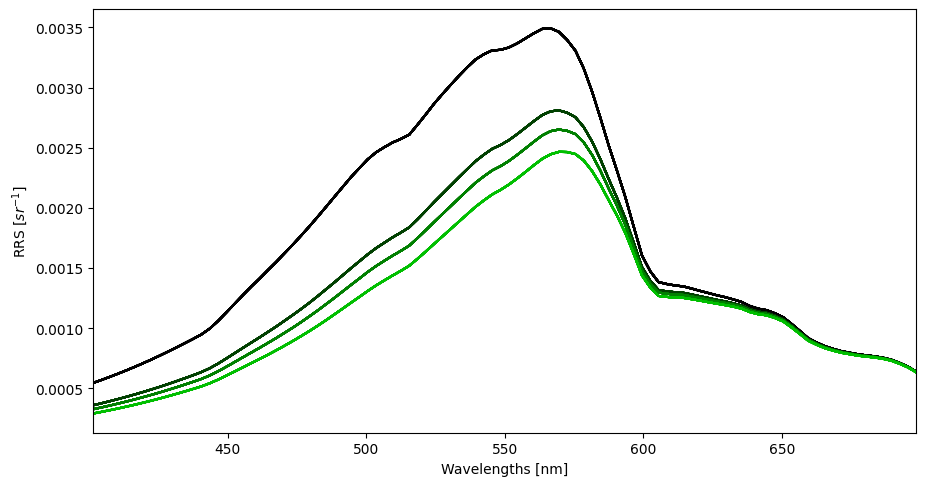

In [ ]:
# Function to plot spectral data
def plot_spectral_data(x, wl, picture_id):
    for i in range(x.shape[0]):
        #print(x.shape)
        #print(x[picture_id,:])
        plt.plot(wl, x[picture_id, :], linestyle='-', color=colors2[picture_id])
    plt.xlabel("Wavelengths [nm]")
    plt.ylabel("RRS [$sr^{-1}$]")
    plt.xlim(401.5, 698.5)



data = pd.read_csv('../../ecolight-s/data/inputs_2025.csv')
ni = len(data['sun_angle'])
num_colors = ni

colors2 = [(0, i / num_colors, 0) for i in range(ni)] 

#for idx in range (10,11):
    # Load the dataset
dataset_path = "../../ecolight-s/output/rrs_output_profile2025/rrsalltest" + "19" +".txt" 
dataset = pd.read_csv(dataset_path, index_col=False)
datasetb = pd.read_csv(dataset_pathb, index_col=False)
# Read data from the dataset
xa = dataset.values[:, 0:-1]
xb = datasetb.values[:, 0:-3]
x_ecolight_profile = np.concatenate((xa, xb), axis=1)
wl_e = np.arange(401.5, 701.5, 3)



for i in range(0,20,5): ## Kun endre denne linjen for å endre plottet
    plot_spectral_data(x_ecolight_profile, wl_e, i)  ##mørkeste verdi er laveste i, lyseste plot er høyeste i

#plot_spectral_data(x, wl, 0) ## Mørkeste
#plot_spectral_data(x, wl, 5)
#plot_spectral_data(x, wl, 10)
#plot_spectral_data(x, wl, 15)
#plot_spectral_data(x, wl, 20)
#plot_spectral_data(x, wl, 25)
#plot_spectral_data(x, wl, 30)
#plot_spectral_data(x, wl, 35)
#plot_spectral_data(x, wl, 40)
#plot_spectral_data(x, wl, 45) ## lyseste 

plt.tight_layout()
plt.gcf().set_size_inches(10, 5)
plt.savefig('rrs_spectra_3nm_am_profile_2023.png', dpi=300, bbox_inches='tight')
plt.show()

## EnMap

[0.008  0.0049 0.0041 0.0068 0.0071 0.006  0.0055 0.0057 0.0054 0.006
 0.0063 0.0055 0.0054 0.0059 0.0069 0.007  0.0067 0.0072 0.007  0.0064
 0.006  0.0062 0.0063 0.006  0.0061 0.0068 0.0069 0.0061 0.0061 0.0062
 0.0061 0.006  0.0055 0.0062 0.0072 0.0078 0.006  0.0048 0.0049 0.0046
 0.0047 0.0047 0.0048 0.0053 0.006  0.0055 0.0047 0.0046 0.0043 0.0041
 0.0042 0.0052 0.005  0.0042 0.0043 0.0063 0.0051 0.0028 0.0011 0.001
 0.0002 0.     0.0006 0.0006 0.0009 0.001 ]
(55, 66)


/tmp/ipykernel_2139100/866927493.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


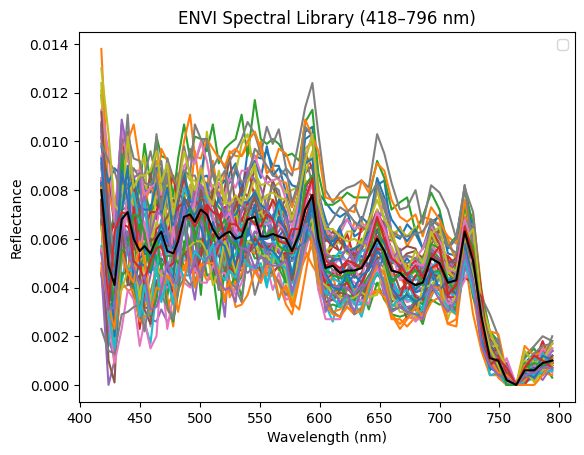

In [ ]:
import spectral
import matplotlib.pyplot as plt
import numpy as np

# Last spektralbiblioteket
spectra = spectral.io.envi.open('../../EnMap/data/23April2025.hdr', '../../EnMap/data/23April2025.sli')
data = spectra.spectra  # (n_spectra x n_bands)

# Hent wavelengths (i µm) og konverter til nm
header = spectral.envi.read_envi_header('../../EnMap/data/23April2025.hdr')
wavelengths_um = header['wavelength']
wavelengths_nm = [float(w) * 1000 for w in wavelengths_um]

# Filtrer basert på ønsket bølgelengdeintervall
min_nm, max_nm = 418, 796
mask = [(w >= min_nm and w <= max_nm) for w in wavelengths_nm]

# Bruk masken til å filtrere både data og wavelengths
filtered_wavelengths = [w for w, m in zip(wavelengths_nm, mask) if m]
filtered_data = data[:, mask]  # Mask langs spektralbånd (aksen 1)

## fikse dette
median_data_EnMap = np.median(np.array(filtered_data), axis = 0)
print(median_data_EnMap)
print(filtered_data.shape)

# Plotting
for i in range(filtered_data.shape[0]):
    plt.plot(filtered_wavelengths, filtered_data[i], )#label=f"Spectrum {i+1}")
plt.plot(filtered_wavelengths, median_data_EnMap, color = "black")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('ENVI Spectral Library (418–796 nm)')
plt.legend()
plt.show()


## Plot

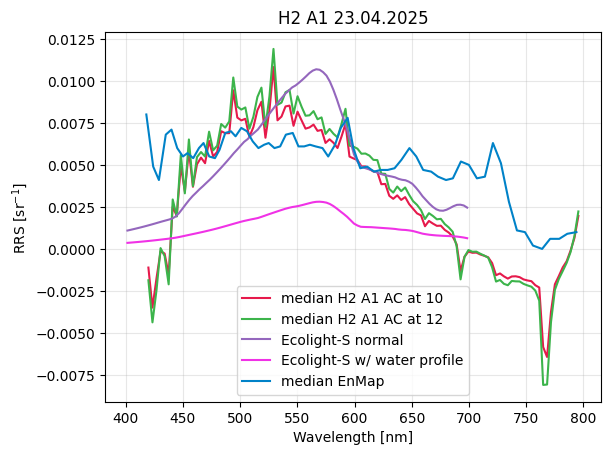

In [ ]:
#H2 kl 10
plt.plot(wl, RRS_median_H2_AC_A1_10, color="#e6194b", linestyle= '-',  label='median H2 A1 AC at 10')
#plt.plot(wl, RRS_median_H2_AC_A2_10, color="#3cb44b", linestyle= '-', label='median H2 A2 AC at 10')
#plt.plot(wl, RRS_median_H2_AC_A3_10, color="#911eb4", linestyle= '-',  label='median H2 A3 AC at 10')
#plt.plot(wl, RRS_median_H2_AC_A5_10, color="#0082c8", linestyle= '-', label='median H2 A4 AC')
#plt.plot(wl, RRS_median_H2_AC_A6_10, color="#f58231", linestyle= '-',  label='median H2 A5 AC at 10',  )#marker="o")

#H2 kl 12
plt.plot(wl, RRS_median_H2_AC_A1_12, color="#3cb44b", linestyle= '-', label='median H2 A1 AC at 12')
#plt.plot(wl, RRS_median_H2_AC_A2_12, color="#0082c8", linestyle= '-.', label='median H2 A2 AC at 12')
#plt.plot(wl, RRS_median_H2_AC_A3_12, color="#0082c8", linestyle= '-.', label='median H2 A3 AC at 12')
#plt.plot(wl, RRS_median_H2_AC_A5_12, color="#f58231", linestyle= '-.', label='median H2 A4 AC')
#plt.plot(wl, RRS_median_H2_AC_A6_12, color="#911eb4", linestyle= '-.', label='median H2 A5 AC at 12',  )#marker="o")

# ECOLIGHT-S 
plt.plot(wl_e, x_ecolight_normal[5, :], color="#9467bd", linestyle= '-',  label='Ecolight-S normal')
#plt.plot(wl_e, x_ecolight_normal[6, :], color="#9467bd", linestyle= '-', )#label='median Ecolight-S A2')
#plt.plot(wl_e, x_ecolight_normal[7, :], color="#9467bd", linestyle= '-',  )#label='median Ecolight-S A3')
#plt.plot(wl_e, x_ecolight_normal[8, :], color="#9467bd", linestyle= '-', )#label='median Ecolight-S A4')
#plt.plot(wl_e, x_ecolight_normal[9, :], color="#9467bd", linestyle= '-',  )#label='median Ecolight-S A5')

plt.plot(wl_e, x_ecolight_profile[5, :], color="#f032e6", linestyle= '-',  label='Ecolight-S w/ water profile')
#plt.plot(wl_e, x_ecolight_profile[6, :], color="#f032e6", linestyle= '-', )#label='median Ecolight-S A2')
#plt.plot(wl_e, x_ecolight_profile[7, :], color="#f032e6", linestyle= '-',  )#label='median Ecolight-S A3')
#plt.plot(wl_e, x_ecolight_profile[8, :], color="#f032e6", linestyle= '-', )#label='median Ecolight-S A4')
#plt.plot(wl_e, x_ecolight_profile[9, :], color="#f032e6", linestyle= '-',  )#label='median Ecolight-S A5')

plt.plot(filtered_wavelengths, median_data_EnMap, color = "#0082c8", label = "median EnMap")


plt.xlabel("Wavelength [nm]")
plt.ylabel("RRS [sr$^{-1}$] ") #Er begge water leaving radience???
plt.title("H2 A1 23.04.2025") ## bruke AC som Atmosperic Correction 
plt.savefig('../resultater/H2vsH2_A2_250511_konekvent.pdf', dpi=300, bbox_inches='tight')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()
